# Integración numérica de las ecuaciones de movimiento

En el presente notebook, vamos a estudiar el procedimiento general para resolver numéricamente las ecuaciones de movimiento para casos particulares.

Como sabemos, la ecuación de movimiento no es otra que la Segunda ley de Newton, escrita en forma de ecuación diferencial: $$ \frac{\text{d}^2 \vec{r}(t)}{\text{d} t^2} = \frac{\vec{F}}{m} $$ donde $\vec{r}(t)$ es el vector de posición, $m$ es la masa y $\vec{F}$ es la fuerza aplicada.

In [1]:
# Importamos las librerías necesarias.
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

Matplotlib is building the font cache; this may take a moment.


In [2]:
# Parámetros generales
m = 1.0
g = 9.8

# Parámetros de integración
tini = 0.0
tfin = 20.0
dt = 0.01

# Condiciones iniciales
t0 = 0.0
x0 = 0.0
v0 = 100.0
y0 = np.array([x0, v0])

time = []
x = []
v = []

In [3]:
def derivs(t,y):
  u = y[1]
  v = -g
  return np.array([u,v])

In [4]:
def integrar(tini,tfin,dt,y0,derivs):
  t = tini
  y = y0
  while t <= tfin:
    y += derivs(t,y)*dt
    t += dt
    time.append(t)
    x.append(y[0])
    v.append(y[1])

In [5]:
integrar(tini,tfin,dt,y0,derivs)

In [6]:
xa = x0+v0*(np.array(time)-t0)-0.5*g*(np.array(time)-t0)**2

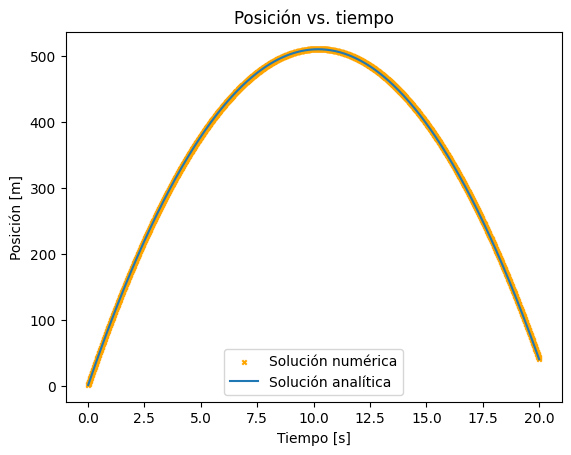

In [7]:
fig, ax = plt.subplots()
plt.title("Posición vs. tiempo")
plt.xlabel("Tiempo [s]")
plt.ylabel("Posición [m]")
ax.scatter(time, x,label="Solución numérica", s=10, c="orange", marker='x')
ax.plot(time,xa,label="Solución analítica")
plt.legend()
plt.show()

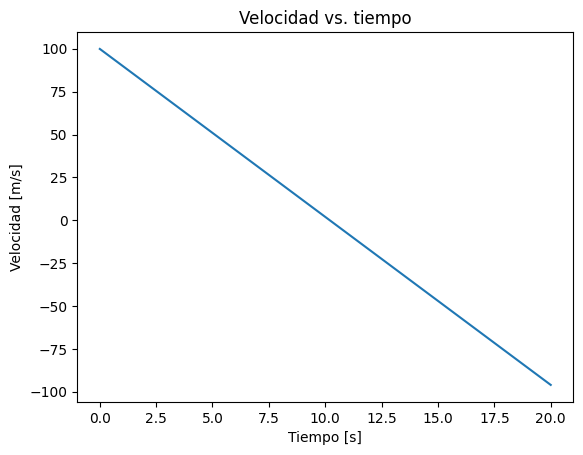

In [8]:
fig, ax = plt.subplots()
plt.title("Velocidad vs. tiempo")
plt.xlabel("Tiempo [s]")
plt.ylabel("Velocidad [m/s]")
ax.plot(time, v)
plt.show()

In [11]:
scat = ax.scatter(time[0], x[0], c="b", s=5, label=f'v0 = {v0} m/s')
ax.set(xlim=[0, 20], ylim=[0, 550], xlabel='Time [s]', ylabel='y [m]')
ax.legend()

def update(frame):
    # for each frame, update the data stored on each artist.
    x = time[:frame]
    y = x[:frame]
    # update the scatter plot:
    data = np.stack([x, y]).T
    scat.set_offsets(data)
    return scat

In [12]:
ani = animation.FuncAnimation(fig=fig, func=update, frames=40, interval=30)
plt.show()